#### HW2: Modeling a Universe with Dark Energy. 

#### Please upload to Blackboard the .ipynb file, containing your last name.

#### Original work statement: 

Please write your name here to indicate that your worksheet is the result of your own work, and you have not copied from sources without citing them (this is plagiarism and is not acceptable). Identical or very similar worksheet will share the credit.

#### Your name: Jake Postiglione

The worksheet is organized as a series of tasks. You can edit this notebook directly by adding code (and comment) cells to perform these tasks. You will need to import packages, even if this is not explicitly requested.

One function from a package that we haven't mentioned so far but you will need is scipy.integrate (numerical integration).

In [131]:
import numpy as np

import math

import scipy.integrate

import matplotlib.pyplot as plt

%matplotlib inline

#### Task 1: Import the data from the file sn_data.txt

This data set contains three columns. 

The first one is the redshift of the supernovae. Redshift is a measure of the velocity at which supernovae are moving away from us. Redshift = 0 means no motion, increasing values represent increasing velocity. Redshift has no units.

The second column is the distance of the supernovae, expressed in the units of Mpc (megaparsec). Mega = 1 Million; 1 parsec (pc) = 3.26 light years.

The third column contains the uncertainties on the distance measurements, (let's call them sigma(d)), again expressed in Mpc.

In [132]:
sndata = np.genfromtxt('sn_data.txt', dtype='float')

redshift = sndata[:, 0]
distance = sndata[:, 1]
distance_sigma = sndata[:, 2]

#### Task 2: Make an errorbar plot of this data set.

Place redshift (z) on the x axis, distance on the y axis, and sigma(d) as the error on the distance. Add labels to the axes and don't forget the units.

<ErrorbarContainer object of 3 artists>

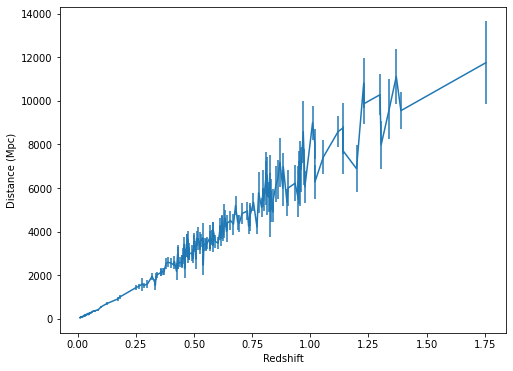

In [133]:
plt.figure(figsize=(8,6))
plt.xlabel('Redshift')
plt.ylabel('Distance (Mpc)')

plt.errorbar(redshift, distance, distance_sigma)

The plot that you just made just shows the data. Now what we want to do is to build different models for the distance of these supernovae, and then choose the model that works best.

Our model for the distance (called "Luminosity Distance" by physicists) is a function of different parameters: 

- z (the redshift) is the independent variable; in other words, our model for the distance will return a distance for any redshift value.

- Omegam is the percentage of matter in the Universe, and it's a number between 0 and 1;

- OmegaDE is the percentage of Dark Energy in the Universe; we can assume that Omegam + OmegaDE = 1 (so the Universe only contains matter and dark energy), which simplifies our model a little bit, because we can write OmegaDE = 1 - Omegam;

- H0 is the Hubble constant, which gives the current rate of expansion of the Universe; we will fix it to be = 70 km/s/Mpc;

- c is the speed of light in km/s; c = 2.99 x 10^5. This is a constant of nature so we won't need to change it.

Here comes our model:


\begin{align}
D_L(z,\Omega_m, H_0, c) = \,(1+z) \frac{c}{H_0}\int_0^z \frac{dx}{\sqrt{\Omega_m(1+x)^3 + \Omega_{DE}}} 
\end{align}

#### Task 3: Complete this function definition. Use the notes above!

Note: Omega_DE is not a parameter of the function, because our function is a function of Omega_m only.


In [134]:
def LumDist(z, Omegam = 0.3, H0 = 70, ckms = 2.99 * 10 ** 5) :

    # return .... scipy.integrate.quad(lambda x: 1./math.sqrt(Omegam*(1.0 + x)**3. + (....)), 0, z)[0]
    return (1 + z) * (ckms / H0) * scipy.integrate.quad(lambda x: 1/math.sqrt(Omegam * (1.0 + x) ** 3 + (1 - Omegam)), 0, z)[0]

#### Task 4

Answer the questions: What are the arguments of the LumDist function? Which ones have default values?

Before continuing, check that LumDist(1) ~ 5512 and LumDist(0.5) ~ 2522.

In [135]:
print(LumDist(1))
print(LumDist(0.5))

6590.191224626158
2825.44963181206


    The arguments of LumDist represent, in order, the measured redshift,
    the percent of matter in the universe, Hubble's constant, and the speed of light in km/s

    The percentage of matter, Hubble's constant, and the speed of light all have default values for the function.

#### Task 5

In its current form, the "LumDist" function cannot take arrays as inputs (only single numbers). We can vectorize the function so we can give it a 1D array of redshifts as input:

vecLumDist = np.vectorize(LumDist)

Check that it works by defining a numpy array, "z", with the first column of your supernova data, and feeding it to your function.


In [136]:
vecLumDist = np.vectorize(LumDist)

lumDistances = vecLumDist(redshift)

#### Task 6

You can now plot the luminosity distance versus redshift for any model of the Universe! 

Begin by plotting z (the redshifts) versus the luminosity distance, for Omega_m = 0.3 (default value).

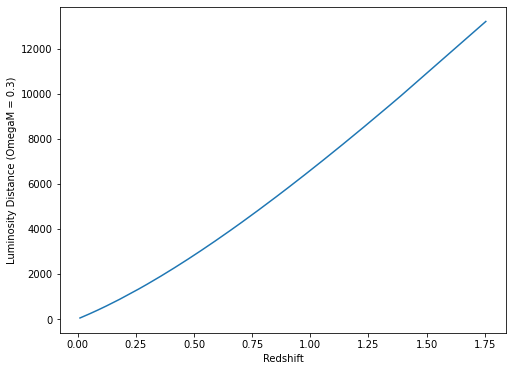

In [137]:
plt.figure(figsize=(8,6))
plt.xlabel('Redshift')
plt.ylabel('Luminosity Distance (OmegaM = 0.3)')

plt.plot(redshift, lumDistances)

#### Task 7

Now let's compare data and models on a scatter plot to see which model best fits the data. Plot the data with error bars as before, and then the luminosity distance curve for the supernovae for three models:
    
Model 1: Omega_m = 0 
    
Model 2: Omega_m = 0.3
    
Model 3: Omega_m = 1

Make sure you add labels for all the models.


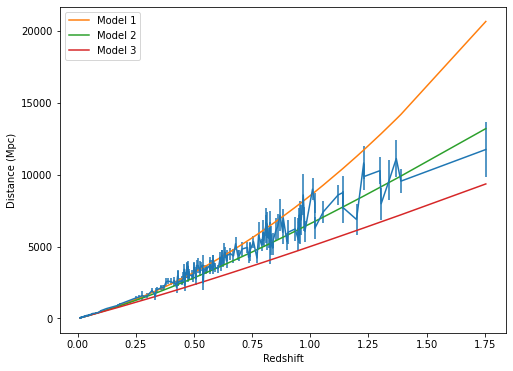

In [138]:
vecLumDistM1 = np.vectorize(lambda z: LumDist(z, Omegam=0))
vecLumDistM2 = np.vectorize(lambda z: LumDist(z))
vecLumDistM3 = np.vectorize(lambda z: LumDist(z, Omegam=1))

plt.figure(figsize=(8,6))
plt.xlabel('Redshift')
plt.ylabel('Distance (Mpc)')

plt.errorbar(redshift, distance, distance_sigma)
plt.plot(redshift, vecLumDistM1(redshift), label="Model 1")
plt.plot(redshift, vecLumDistM2(redshift), label="Model 2")
plt.plot(redshift, vecLumDistM3(redshift), label="Model 3")
plt.legend()

#### Task 8

Answer the following questions:

1) What are the Omega_DE values for the above models? Which model contains no Dark Energy at all?

2) Just judging by eye, which model seems to be the best fit to the data and why?

    1) The Omega_DE values for the models above are 1, 0.7, and 0 respectivly.
       Since Omega_DE = 1 - Omega_M, the model with no Dark Energy is Model 3.

    2) Judging by eye, the model with the best fit to the data seems to be model 2.
       This is the case since it most closely trends with and within the error bars of the plotted values.

#### Task 9

It is now time to define a proper function to judge whether these models are good fit to the data. This is done through the $\chi^2$ function that we mentioned in the "Fit a line" notebook.

We can use the following function:

In [139]:
def chi2(x,x_err,y):
    """
    # this function computes the chi2 between a vector containing measurements 
    #(x) and their experimental errors (x_err), with respect to a model predictions y 
    """
    return np.sum((x-y)**2/x_err**2)

Calculate the $\chi^2$ of the model with Omega_m = 0.3. 

The task is to understand what vectors to use for x (observed luminosity distances), x_err (uncertainties), and y (luminosity distances predicted by a given model).

In [140]:
chi2(distance, distance_sigma, vecLumDistM2(redshift))

316.2052793273291

#### Task 10

And now the magic begins!

Calculate and save the $\chi^2$ values for different models with values of Omega_m between 0 and 1, spaced every 0.05.

Create a scatter plot that has the values of Omega_m on the x axis, and the value of the $\chi^2$ on the y axis.

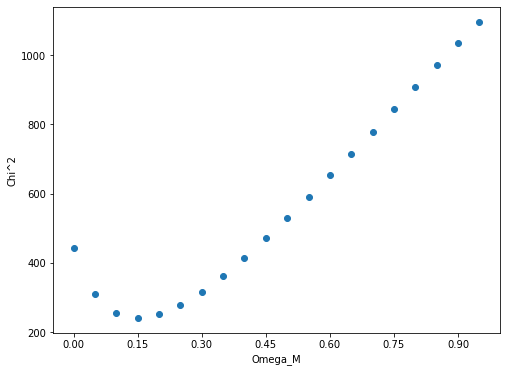

In [141]:
modelValues = np.arange(0, 1, 0.05)

lumDistanceModels = []

for m in modelValues:
    vecLumDistM = np.vectorize(lambda z: LumDist(z, Omegam=m))

    lumDistanceModels.append(vecLumDistM(redshift))

chi2Values = []

for model in lumDistanceModels:
    chi2Values.append(chi2(distance, distance_sigma, model))

plt.figure(figsize=(8,6))
plt.xlabel('Omega_M')
plt.ylabel('Chi^2')

plt.xticks(np.arange(0, 1, 0.15))

plt.scatter(modelValues, chi2Values)

#### Task 11

Find the model with the lowest $\chi^2$ and answer the questions:

1. Which value of Omega_m corresponds to this model? 

2. Which value of Omega_DE corresponds to this model?

3. Based on your answers, is a non-zero value of Dark Energy supported by the data?

    1) The Omega_m for the model with the lowest $\chi^2$ is 0.15.

    2) In this model, Omega_DE would be 0.85.

    3) Yes, according to this data the amount of Dark Energy in the universe must be a non-zero value.

#### Task 12 (optional, for Extra Credit)

Repeat the $\chi^2$ analysis for a two parameter model, with Omega_m varying between 0 and 1 in 0.05 intervals 
and H_0, the Hubble constant, varying between 50 and 80 km/s/Mpc in intervals of 5 km/s/Mpc.

What are the values of Omega_m and H_0 that correspond to the lowest $\chi^2$? How do your conclusions change in this case?


In [142]:
modelValues = np.arange(0, 1, 0.05) # 20 Values
hubbleValues = np.arange(50, 80, 5) # 6 Values

lumDistanceModels = []

chi2Values = []

for m in modelValues:
    for h in hubbleValues:
        vecLumDistM = np.vectorize(lambda z: LumDist(z, H0=h, Omegam=m))

        chi2Values.append(chi2(distance, distance_sigma, vecLumDistM(redshift)))

chi2Array = np.array(chi2Values).reshape((20, 6))

minChi2 = np.where(chi2Array == chi2Array.min())

print(modelValues[minChi2[0]], hubbleValues[minChi2[1]])

[0.3] [65]


The lowest $\chi^2$ value corresponds to an Omega_M value of 0.3 and a H_0 value of 65.